<a href="https://colab.research.google.com/github/Nagmashaik123/INFO5505MachineLearning/blob/main/Shaik_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade kneed

In [3]:
# Importing all the necessary Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib.image import imread
from kneed import KneeLocator
sns.set()

In [4]:
# Loading the Training data set provided and dropping the nulls if there exists any
df_train_data = pd.read_csv('/content/ALS_TrainingData_2223.csv')
df_train_data.dropna()
df_train_data.shape

(2223, 101)

In [5]:
# Loading the Test data set provided and dropping the nulls if there exists any
df_test_data = pd.read_csv('/content/ALS_TestingData_78.csv')
df_test_data.dropna()
df_test_data.shape


(78, 131)

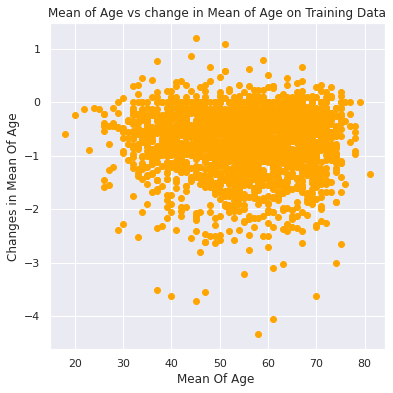

In [9]:
# Visualization of intial raw data i.e traning data
plt.figure(figsize=(6, 6))
plt.scatter(df_train_data['Age_mean'], df_train_data['ALSFRS_slope'],color='orange')
plt.xlabel('Mean Of Age ')
plt.ylabel('Changes in Mean Of Age')
plt.title('Mean of Age vs change in Mean of Age on Training Data');


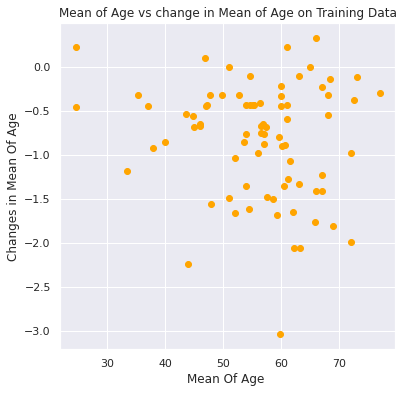

In [10]:
# Visualization of intial raw data i.e on  testing data
plt.figure(figsize=(6, 6))
plt.scatter(df_test_data['Age_mean'], df_test_data['ALSFRS_slope'],color='orange')
plt.xlabel('Mean Of Age ')
plt.ylabel('Changes in Mean Of Age')
plt.title('Mean of Age vs change in Mean of Age on Training Data');

In [12]:
#pd.set_option("display.max_rows",df_train_data.shape[0]+1)
#pd.set_option("display.max_rows",df_test_data.shape[0]+1)
df_train_data.isnull().sum()
df_test_data.isnull().sum()

ID                               0
Age_mean                         0
Albumin_max                      0
Albumin_median                   0
Albumin_min                      0
                                ..
Urine.Ph_range                   0
White.Blood.Cell..WBC._max       0
White.Blood.Cell..WBC._median    0
White.Blood.Cell..WBC._min       0
White.Blood.Cell..WBC._range     0
Length: 131, dtype: int64

In [13]:
# Preparing the data for the analysis
df_standard = StandardScaler().fit_transform(df_train_data)

In [14]:
#Applying K-Means to calculate centriods of clusters and inertia
k_means_data = KMeans(n_clusters=2, random_state=39, max_iter=100 )
k_means_data.fit(df_standard)
centroids_data = k_means_data.cluster_centers_
inertia_data = k_means_data.inertia_
print('SSE value of the analysis:', inertia_data)

SSE value of the analysis: 207788.85417228256


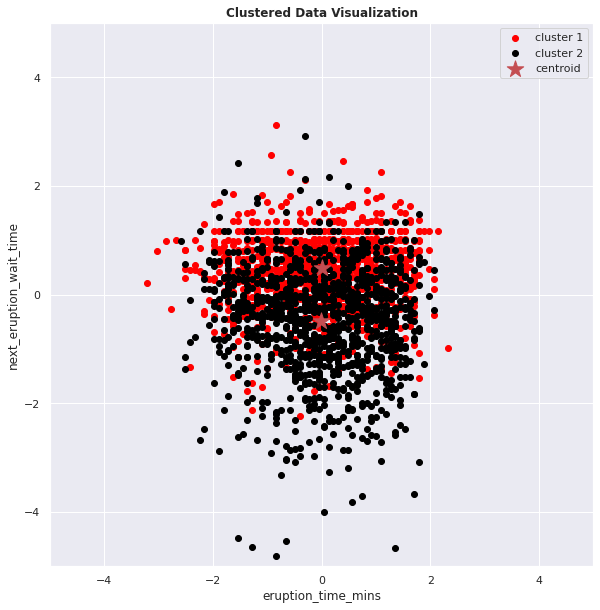

In [15]:
# Visualizing the plot with k-means analysed centroids
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(df_standard[k_means_data.labels_ == 0, 1], df_standard[k_means_data.labels_ == 0, 6],
            c='red', label='cluster 1')
plt.scatter(df_standard[k_means_data.labels_ == 1, 1], df_standard[k_means_data.labels_ == 1, 6],
            c='black', label='cluster 2')
plt.scatter(centroids_data[:, 1], centroids_data[:, 6], marker='*', s=300,
            c='r', label='centroid')
# Applying the parameters of plot for the visualization graph
plt.legend()
plt.xlabel('eruption_time_mins')
plt.ylabel('next_eruption_wait_time')
plt.title('Clustered Data Visualization', fontweight='bold')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
ax.set_aspect('equal')

In [16]:
# Computing Correlation values on the training data
corrrelation_train = df_train_data.corrwith(df_train_data['ALSFRS_slope'])
correlation_data_train = pd.DataFrame(corrrelation_train, columns = ['score'])

In [17]:
# printing positively Correlated with ALSFRS_slope values
print('ALSFRS_slope positively correlated: ' )
print(correlation_data_train[correlation_data_train['score'] >= 0.2])

ALSFRS_slope positively correlated: 
                        score
ALSFRS_slope         1.000000
ALSFRS_Total_median  0.247250
ALSFRS_Total_min     0.601810
hands_min            0.424107
leg_min              0.348967
mouth_median         0.244704
mouth_min            0.435538
respiratory_min      0.380749
trunk_min            0.488530


In [18]:
# printing negetively Correlated with ALSFRS_slope values
print('ALSFRS_slope negetively correlated: ' )
print(correlation_data_train[correlation_data_train['score'] <= -0.2])

ALSFRS_slope negetively correlated: 
                       score
Albumin_range      -0.226123
ALSFRS_Total_range -0.819305
hands_range        -0.632350
Hemoglobin_range   -0.209774
leg_range          -0.584507
mouth_range        -0.553194
onset_delta_mean   -0.324307
pulse_range        -0.236961
respiratory_range  -0.432878
trunk_range        -0.686407


In [19]:
## Chosing K value for clustering using elbow method
sse_list = []
cluster_list = list(range(1, 10))
for k in cluster_list:
    km_data = KMeans(n_clusters=k)
    km_data.fit(df_standard)
    sse_list.append(km_data.inertia_)

<Figure size 792x792 with 0 Axes>

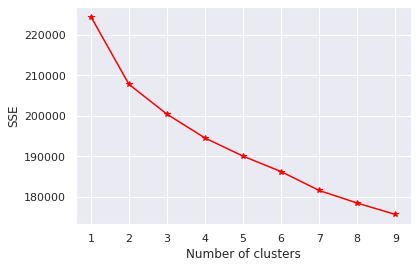

<Figure size 792x792 with 0 Axes>

In [20]:
# Visualization plot for K-Means Number of clusters vs SSE
plt.plot(cluster_list, sse_list, marker = '*',color='red')
plt.xlabel('Number of clusters')
plt.ylabel('SSE');
plt.figure(figsize=(11, 11))

In [22]:
kneeLocator_elbow = KneeLocator(range(1, 10), sse_list, curve="convex", direction="decreasing")
print("Values of KneeLocation elbows : ",kneeLocator_elbow.elbow)

Values of KneeLocation elbows :  3


In [23]:
#Calculating Silhouette Coefficient values
sil_coef_list=[]
for clust in range (2,11):
  kmeans_silhouette = KMeans(n_clusters = clust)
  kmeans_silhouette.fit(df_standard)
  sil_cof_score = silhouette_score(df_standard,kmeans_silhouette.labels_ )
  sil_coef_list.append(sil_cof_score)

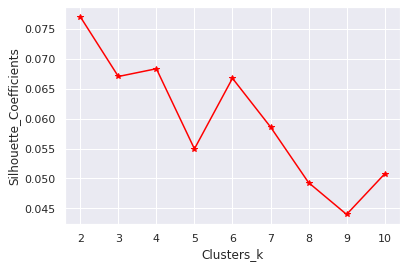

<Figure size 792x792 with 0 Axes>

In [24]:
# Visualization of the clusters drawn to the silhouette coefficients
x = []
for item in range(2, 11):
  x.append(item)
y=sil_coef_list
plt.plot(x, y, marker='*',color='red')
plt.xticks(x)
plt.xlabel('Clusters_k')
plt.ylabel('Silhouette_Coefficients')
plt.figure(figsize=(11, 11))
plt.show()

In [25]:
# Based on the two method depicted above the value of K selected is 3 for the analysis
k_accurate = KMeans(n_clusters = 3)
k_accurate.fit(df_standard)
pred = k_accurate.predict(df_standard)

In [26]:
# Calculated centroids for the clusters
centroids_clusters  = k_accurate.cluster_centers_
print("Calculated centroids for the clusters : ",centroids_clusters)
print(centroids_clusters)

Calculated centroids for the clusters :  [[-3.08794599e-02  3.07878202e-01 -1.47921590e-01 -2.30637983e-01
  -2.95775067e-01  4.18285742e-01 -1.08537893e+00  9.86489715e-02
  -2.19480421e-01 -7.58421726e-01  1.22297426e+00  5.77380649e-02
  -8.55172573e-02 -9.59082162e-02  2.57976281e-01 -6.40438758e-03
  -4.17619555e-02 -3.82417504e-02  1.93159023e-01  3.38912617e-01
   3.50449321e-01  3.21077571e-01  5.15494665e-01  7.97443142e-02
   1.05694262e-01  8.17092916e-02  4.15604092e-01 -9.34376967e-02
  -1.01547504e-01 -8.91296934e-02  3.26912518e-01  3.93707024e-02
  -2.67856430e-02 -8.56516524e-02  4.61474211e-01 -5.37210955e-02
  -4.21230102e-02  2.57356736e-02  1.42224004e-01 -3.17591360e-01
  -3.92524369e-01 -4.15825925e-01  5.63237857e-01  4.92907119e-02
   3.29403374e-02 -8.85490135e-02  4.71213212e-01 -1.79565159e-01
   4.64487092e-02  2.37727680e-02  6.77603335e-02  2.57050922e-01
   3.04656291e-01  1.46617436e-01 -2.59477421e-01  8.54298198e-01
   1.00959343e-02 -1.29177521e-02 -

In [27]:
# Centroids to interpret the clusters
centroids_clusters  = k_accurate.cluster_centers_
centroids_df = pd.DataFrame(centroids_clusters, columns = df_train_data.columns)
print('\t'*5, ' The Table of Centroids')
centroids_df

					  The Table of Centroids


,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,-0.030879,0.307878,-0.147922,-0.230638,-0.295775,0.418286,-1.085379,0.098649,-0.219480,-0.758422,1.222974,0.057738,-0.085517,-0.095908,0.257976,-0.006404,-0.041762,-0.038242,0.193159,0.338913,0.350449,0.321078,0.515495,0.079744,0.105694,0.081709,0.415604,-0.093438,-0.101548,-0.089130,0.326913,0.039371,-0.026786,-0.085652,0.461474,-0.053721,-0.042123,0.025736,0.142224,-0.317591,...,-0.231186,-0.266767,0.436103,0.319995,0.090254,-0.308745,0.931893,-0.669554,-0.745719,-0.926822,0.935509,0.483463,-0.581065,0.311668,0.168902,0.125962,0.060485,0.113673,0.058946,0.249731,0.398813,0.321026,0.254439,0.546981,-0.269300,-0.445126,-0.691011,0.725981,-0.109118,-0.115943,-0.159069,0.499808,-0.031471,0.335267,0.118806,-0.377416,0.993025,0.111724,0.119911,-0.018004
1,0.049151,0.007607,0.104159,0.159501,0.212607,-0.207876,0.528126,0.660473,0.779957,0.871383,-0.624394,-0.000178,0.101031,0.160653,-0.107365,0.057738,0.167031,0.209531,-0.063261,0.024744,0.078863,0.065046,-0.175398,0.060283,0.134335,0.165982,-0.175593,-0.029866,0.033854,0.051391,-0.162477,0.006904,0.056493,0.107315,-0.189933,-0.054182,-0.106108,-0.043029,-0.090047,0.084531,...,0.117941,0.173228,-0.233678,0.354637,0.469166,0.611553,-0.336629,0.303242,0.385677,0.512289,-0.533242,-0.002200,0.096800,-0.183606,-0.139845,-0.084327,-0.008356,0.074882,0.082551,-0.101242,-0.269521,-0.228363,-0.172806,-0.238917,0.168518,0.337146,0.460041,-0.441113,0.040912,0.047022,0.086182,-0.200157,0.048845,0.566899,0.675306,0.793245,-0.509809,-0.105767,-0.059107,-0.027010
2,-0.044409,-0.217420,-0.038563,-0.056277,-0.082862,-0.005914,0.030305,-0.942606,-0.886879,-0.645232,0.004743,-0.038646,-0.076438,-0.148533,-0.031296,-0.072282,-0.193458,-0.252208,-0.046155,-0.261054,-0.340616,-0.302507,-0.114461,-0.133672,-0.249383,-0.275214,-0.046935,0.102542,0.023473,-0.008153,-0.004608,-0.035672,-0.056905,-0.084683,-0.058800,0.108054,0.169128,0.039750,0.023680,0.101733,...,-0.000776,-0.050157,0.016316,-0.685945,-0.683167,-0.603364,-0.180982,0.048611,-0.009455,-0.055460,0.077405,-0.322652,0.262884,0.033687,0.071775,0.027043,-0.029646,-0.175887,-0.149206,-0.033867,0.088977,0.086760,0.057899,-0.051401,-0.042204,-0.147499,-0.144947,0.096288,0.019208,0.015699,-0.007208,-0.071052,-0.043604,-0.977814,-0.975857,-0.798151,0.007588,0.065073,-0.002340,0.047956


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

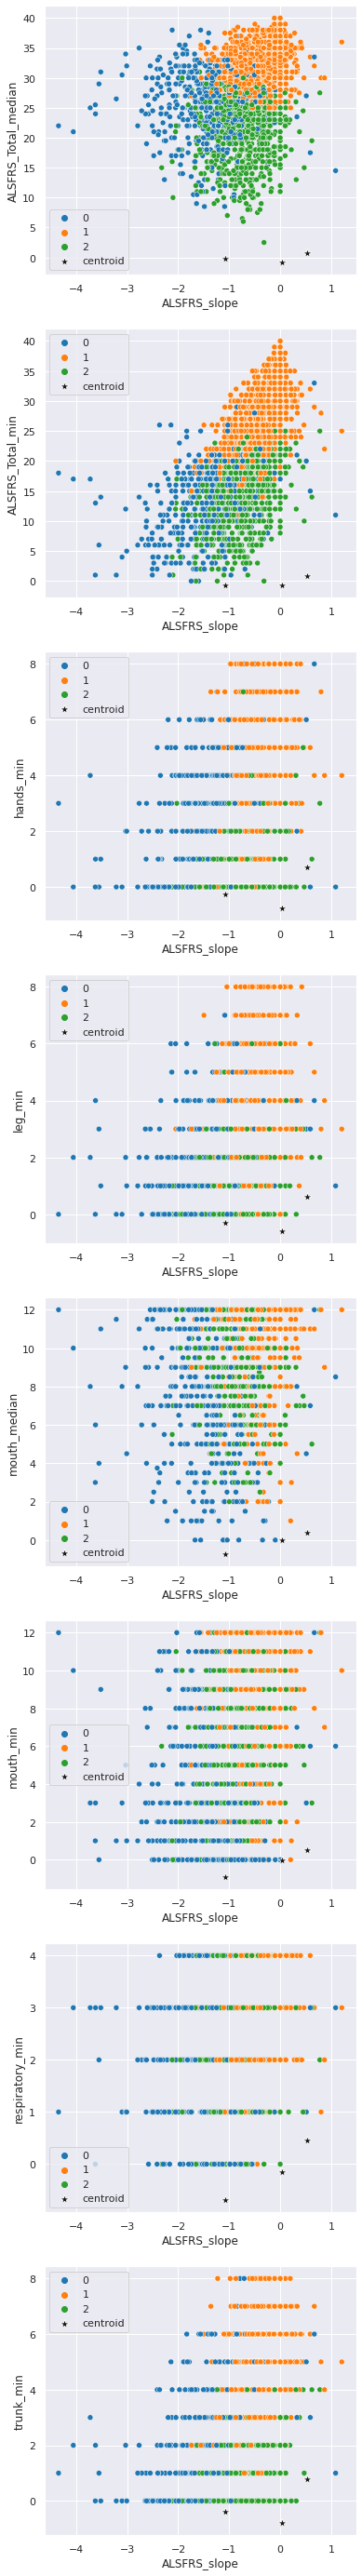

In [31]:
# Visualizing the dataplot for different clusters
df_train_data['cluster'] = pred

labelList = ['ALSFRS_Total_median','ALSFRS_Total_min', 'hands_min',  'leg_min', 'mouth_median', 'mouth_min', 'respiratory_min', 'trunk_min']

fig, ax = plt.subplots(8,1,figsize=(6,50))
for item,yVal in enumerate(labelList):
  sns.scatterplot ('ALSFRS_slope', yVal, hue = 'cluster', palette= 'tab10', data = df_train_data, ax=ax[item])
  sns.scatterplot ('ALSFRS_slope' , yVal,   color='.1', s = 100, marker="*",label = 'centroid', data = centroids_df, ax=ax[item])

In [33]:
# Validating the results using Testing data
df_std_test = StandardScaler().fit_transform(df_test_data)

In [34]:
k_means_test= KMeans(n_clusters = 3)
k_means_test.fit(df_std_test)
test_pred = k_means_test.predict(df_std_test)

In [35]:
#Validating the values of centroids
centr  = k_means_test.cluster_centers_
centroids_df = pd.DataFrame(centr, columns = df_test_data.columns)
centroids_df = centroids_df['ALSFRS_slope']
print('The values of Centroids')
centroids_df

The values of Centroids


0    0.376880
1   -0.267908
2    0.364174
Name: ALSFRS_slope, dtype: float64